In [3]:
!pip install pandas numpy seaborn matplotlib klib dtale scikit-learn joblib pandas-profiling xgboost


  Using cached dtale-2.2.0-py2.py3-none-any.whl (12.7 MB)
  Using cached pandas_profiling-3.1.0-py2.py3-none-any.whl (261 kB)
  Using cached Jinja2-3.1.1-py3-none-any.whl (132 kB)
  Using cached squarify-0.4.3-py3-none-any.whl (4.3 kB)
  Using cached dash_daq-0.5.0-py3-none-any.whl


  Using cached kaleido-0.2.1-py2.py3-none-win_amd64.whl (65.9 MB)
  Using cached lz4-4.0.0-cp39-cp39-win_amd64.whl (96 kB)
  Using cached xarray-2022.3.0-py3-none-any.whl (870 kB)
  Using cached dash_colorscales-0.0.4-py3-none-any.whl
  Using cached strsimpy-0.2.1-py3-none-any.whl (45 kB)
  Using cached dash-2.3.1-py3-none-any.whl (9.6 MB)
  Using cached ppscore-1.2.0-py2.py3-none-any.whl
  Using cached flask_ngrok-0.0.25-py3-none-any.whl (3.1 kB)
  Using cached missingno-0.4.2-py3-none-any.whl (9.7 kB)
  Using cached Flask_Compress-1.11-py3-none-any.whl (7.9 kB)
  Using cached plotly-5.7.0-py2.py3-none-any.whl (28.8 MB)
  Using cached dash_bootstrap_components-1.1.0-py3-none-any.whl (210 kB)
  Using cached pydantic-1.9.0-cp39-cp39-win_amd64.whl (2.1 MB)
  Using cached phik-0.12.2-cp39-cp39-win_amd64.whl (685 kB)
  Using cached visions-0.7.4-py3-none-any.whl (102 kB)
  Using cached multimethod-1.8-py3-none-any.whl (9.8 kB)
  Using cached htmlmin-0.1.12-py3-none-any.whl
  Using cached t


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\jinja2-2.11.3.dist-info\\direct_url.json'
Consider using the `--user` option or check the permissions.



In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df_train= pd.read_csv(r'C:\Users\Roshan\Desktop\Sales_pred\Sales_Prediction\dataset\train.csv')


In [10]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  2116
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  3559
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12522 entries, 0 to 12521
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            12522 non-null  object 
 1   Item_Weight                10406 non-null  float64
 2   Item_Fat_Content           12522 non-null  object 
 3   Item_Visibility            12522 non-null  float64
 4   Item_Type                  12522 non-null  object 
 5   Item_MRP                   12522 non-null  float64
 6   Outlet_Identifier          12522 non-null  object 
 7   Outlet_Establishment_Year  12522 non-null  int64  
 8   Outlet_Size                8963 non-null   object 
 9   Outlet_Location_Type       12522 non-null  object 
 10  Outlet_Type                12522 non-null  object 
 11  Item_Outlet_Sales          12522 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.1+ MB


In [7]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,10406.000000,12522.000000,12522.000000,12522.000000,12522.000000
mean,12.882102,0.066044,140.940513,1997.854336,2182.531700
std,4.643995,0.051520,62.364311,8.344254,1706.922575
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.800000,0.026982,93.646200,1987.000000,831.417750
50%,12.600000,0.053981,142.914100,1999.000000,1789.670400
75%,16.850000,0.094292,186.024000,2004.000000,3097.967400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Item_Weight is numerical column so we fill it with Mean Imputation

In [8]:
df_train['Item_Weight'].describe()

count    10406.000000
mean        12.882102
std          4.643995
min          4.555000
25%          8.800000
50%         12.600000
75%         16.850000
max         21.350000
Name: Item_Weight, dtype: float64

In [9]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True)


In [10]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  3559
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
df_train['Item_Weight'].describe()

count    12522.000000
mean        12.882102
std          4.233439
min          4.555000
25%          9.395000
50%         12.882102
75%         16.100000
max         21.350000
Name: Item_Weight, dtype: float64

### Outlet_Size is catagorical column so we fill it with Mode Imputation

In [12]:
df_train['Outlet_Size'].value_counts()

Medium    4071
Small     3513
High      1379
Name: Outlet_Size, dtype: int64

In [13]:
df_train['Outlet_Size'].mode()

0    Medium
dtype: object

In [14]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace=True)


In [15]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Selecting features based on general requirements

In [16]:
df_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)


In [17]:
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300000,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920000,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500000,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930000,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
12517,12.882102,Regular,0.087422,Frozen Foods,154.4630,1985,Medium,Tier 3,Supermarket Type3,2972.7970
12518,13.350000,Low Fat,0.038745,Snack Foods,239.3564,2007,Medium,Tier 2,Supermarket Type1,3098.6332
12519,20.100000,Low Fat,0.124911,Dairy,109.6228,1998,Medium,Tier 3,Grocery Store,110.5228
12520,8.185000,Low Fat,0.046673,Fruits and Vegetables,48.4692,2009,Medium,Tier 3,Supermarket Type2,591.2304


# EDA using Klib Library

In [18]:
import klib

GridSpec(6, 5)

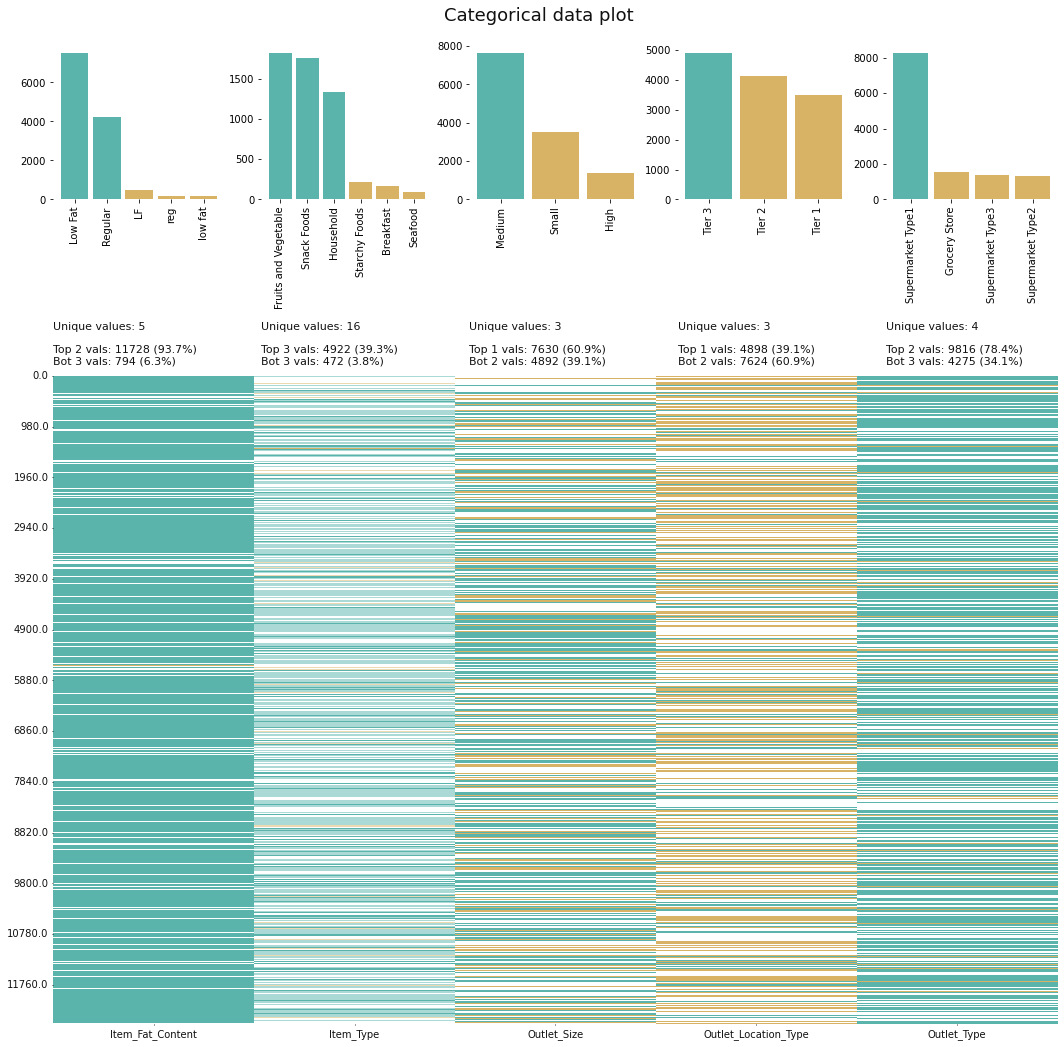

In [19]:
# klib.describe - functions for visualizing datasets
klib.cat_plot(df_train) # returns a visualization of the number and frequency of categorical features


In [20]:
klib.corr_mat(df_train) # returns a color-encoded correlation matrix


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.01,0.02,-0.01,0.01
Item_Visibility,-0.01,1.00,-0.00,-0.08,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,-0.01,-0.08,0.01,1.00,-0.05
Item_Outlet_Sales,0.01,-0.13,0.57,-0.05,1.00


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

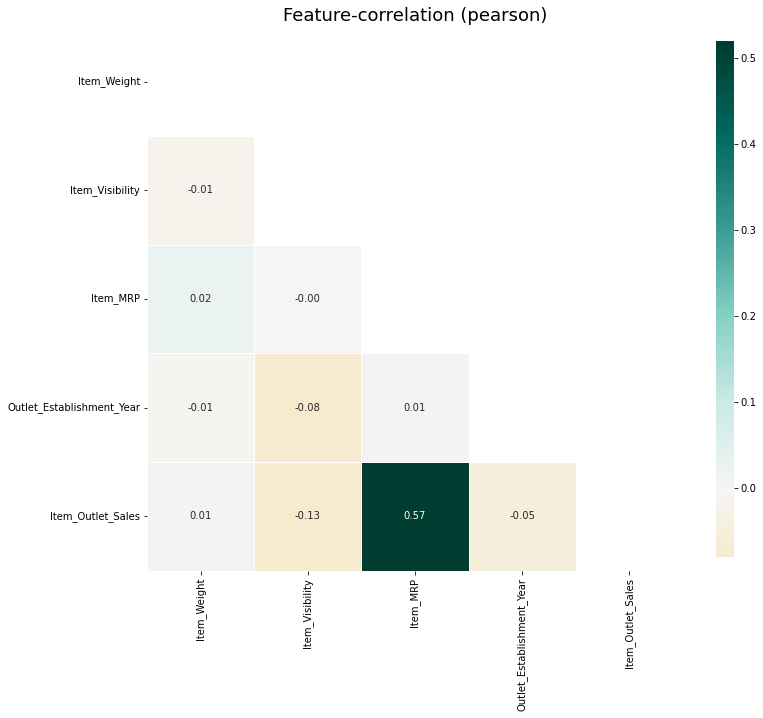

In [21]:
klib.corr_plot(df_train) # returns a color-encoded heatmap, ideal for correlations


Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

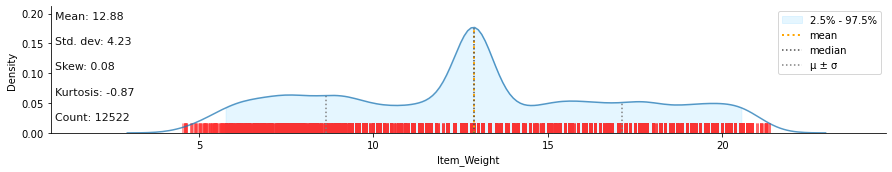

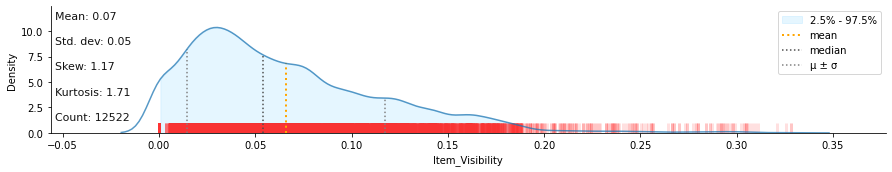

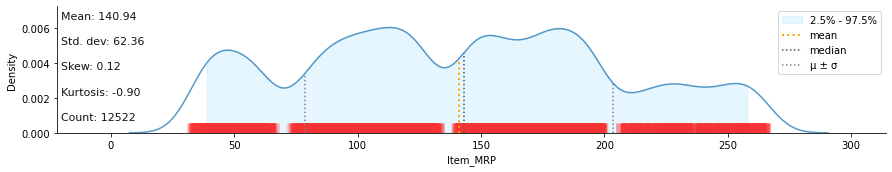

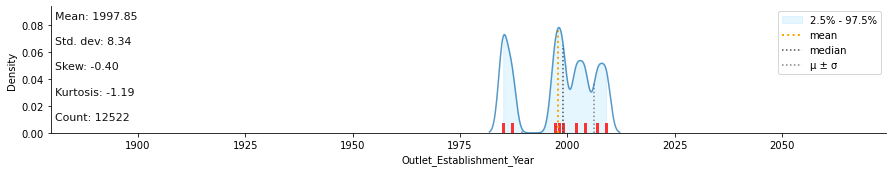

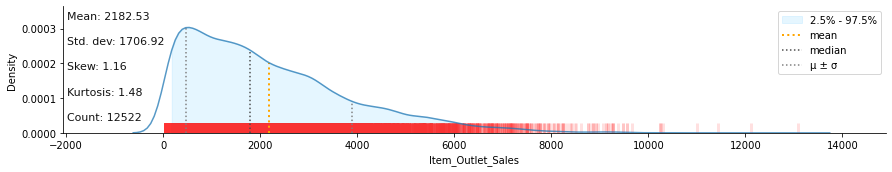

In [27]:
klib.dist_plot(df_train) # returns a distribution plot for every numeric feature


In [28]:
klib.missingval_plot(df_train) # returns a figure containing information about missing values

No missing values found in the dataset.


# Data Cleaning using Klib Library

In [ ]:
# klib.clean - functions for cleaning datasets
klib.data_cleaning(df_train) # performs datacleaning (drop duplicates & empty rows/cols, adjust dtypes,...)

In [43]:
klib.clean_column_names(df_train) # cleans and standardizes column names, also called inside data_cleaning()


,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.3,Low Fat,0.016047,Dairy,249.809204,1999,Medium,Tier 1,Supermarket Type1,3735.137939
1,5.92,Regular,0.019278,Soft Drinks,48.269199,2009,Medium,Tier 3,Supermarket Type2,443.422791
2,17.5,Low Fat,0.01676,Meat,141.617996,1999,Medium,Tier 1,Supermarket Type1,2097.27002
3,19.200001,Regular,0.0,Fruits and Vegetables,182.095001,1998,Medium,Tier 3,Grocery Store,732.380005
4,8.93,Low Fat,0.0,Household,53.861401,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
12517,12.882102,Regular,0.087422,Frozen Foods,154.462997,1985,Medium,Tier 3,Supermarket Type3,2972.797119
12518,13.35,Low Fat,0.038745,Snack Foods,239.3564,2007,Medium,Tier 2,Supermarket Type1,3098.633301
12519,20.1,Low Fat,0.124911,Dairy,109.622803,1998,Medium,Tier 3,Grocery Store,110.522797
12520,8.185,Low Fat,0.046673,Fruits and Vegetables,48.4692,2009,Medium,Tier 3,Supermarket Type2,591.230408


In [44]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12522 entries, 0 to 12521
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   item_weight                12522 non-null  Float32 
 1   item_fat_content           12522 non-null  category
 2   item_visibility            12522 non-null  Float32 
 3   item_type                  12522 non-null  category
 4   item_mrp                   12522 non-null  Float32 
 5   outlet_establishment_year  12522 non-null  int16   
 6   outlet_size                12522 non-null  category
 7   outlet_location_type       12522 non-null  category
 8   outlet_type                12522 non-null  category
 9   item_outlet_sales          12522 non-null  Float32 
dtypes: Float32(4), category(5), int16(1)
memory usage: 331.6 KB


In [45]:
df_train=klib.convert_datatypes(df_train) # converts existing to more efficient dtypes, also called inside data_cleaning()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12522 entries, 0 to 12521
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   item_weight                12522 non-null  Float32 
 1   item_fat_content           12522 non-null  category
 2   item_visibility            12522 non-null  Float32 
 3   item_type                  12522 non-null  category
 4   item_mrp                   12522 non-null  Float32 
 5   outlet_establishment_year  12522 non-null  int16   
 6   outlet_size                12522 non-null  category
 7   outlet_location_type       12522 non-null  category
 8   outlet_type                12522 non-null  category
 9   item_outlet_sales          12522 non-null  Float32 
dtypes: Float32(4), category(5), int16(1)
memory usage: 331.6 KB


In [46]:
klib.mv_col_handling(df_train)

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.3,Low Fat,0.016047,Dairy,249.809204,1999,Medium,Tier 1,Supermarket Type1,3735.137939
1,5.92,Regular,0.019278,Soft Drinks,48.269199,2009,Medium,Tier 3,Supermarket Type2,443.422791
2,17.5,Low Fat,0.01676,Meat,141.617996,1999,Medium,Tier 1,Supermarket Type1,2097.27002
3,19.200001,Regular,0.0,Fruits and Vegetables,182.095001,1998,Medium,Tier 3,Grocery Store,732.380005
4,8.93,Low Fat,0.0,Household,53.861401,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
12517,12.882102,Regular,0.087422,Frozen Foods,154.462997,1985,Medium,Tier 3,Supermarket Type3,2972.797119
12518,13.35,Low Fat,0.038745,Snack Foods,239.3564,2007,Medium,Tier 2,Supermarket Type1,3098.633301
12519,20.1,Low Fat,0.124911,Dairy,109.622803,1998,Medium,Tier 3,Grocery Store,110.522797
12520,8.185,Low Fat,0.046673,Fruits and Vegetables,48.4692,2009,Medium,Tier 3,Supermarket Type2,591.230408


# Preprocessing Task before Model Building

## 1) Label Encoding

In [47]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [49]:
df_train['item_fat_content']= le.fit_transform(df_train['item_fat_content'])
df_train['item_type']= le.fit_transform(df_train['item_type'])
df_train['outlet_size']= le.fit_transform(df_train['outlet_size'])
df_train['outlet_location_type']= le.fit_transform(df_train['outlet_location_type'])
df_train['outlet_type']= le.fit_transform(df_train['outlet_type'])

In [50]:
df_train

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.3,1,0.016047,4,249.809204,1999,1,0,1,3735.137939
1,5.92,2,0.019278,14,48.269199,2009,1,2,2,443.422791
2,17.5,1,0.01676,10,141.617996,1999,1,0,1,2097.27002
3,19.200001,2,0.0,6,182.095001,1998,1,2,0,732.380005
4,8.93,1,0.0,9,53.861401,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
12517,12.882102,2,0.087422,5,154.462997,1985,1,2,3,2972.797119
12518,13.35,1,0.038745,13,239.3564,2007,1,1,1,3098.633301
12519,20.1,1,0.124911,4,109.622803,1998,1,2,0,110.522797
12520,8.185,1,0.046673,6,48.4692,2009,1,2,2,591.230408


# 2) Splitting our data into train and test

In [52]:
X=df_train.drop('item_outlet_sales',axis=1)

In [53]:
Y=df_train['item_outlet_sales']

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=101, test_size=0.2)

# 3) Standarization 

In [55]:
X.describe()

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
count,12522.000000,12522.000000,12522.000000,12522.000000,12522.000000,12522.000000,12522.00000,12522.000000,12522.000000
mean,12.882102,1.368152,0.066044,7.228079,140.940505,1997.854336,1.17042,1.111723,1.199409
std,4.233438,0.644490,0.051520,4.209821,62.364311,8.344254,0.60138,0.811265,0.792156
min,4.555000,0.000000,0.000000,0.000000,31.290001,1985.000000,0.00000,0.000000,0.000000
25%,9.395000,1.000000,0.026982,4.000000,93.646202,1987.000000,1.00000,0.000000,1.000000
50%,12.882102,1.000000,0.053981,6.000000,142.914093,1999.000000,1.00000,1.000000,1.000000
75%,16.100000,2.000000,0.094292,10.000000,186.024002,2004.000000,2.00000,2.000000,1.000000
max,21.350000,4.000000,0.328391,15.000000,266.888397,2009.000000,2.00000,2.000000,3.000000


In [56]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [57]:
X_train_std= sc.fit_transform(X_train)

In [58]:
X_test_std= sc.transform(X_test)

In [79]:
X_train_std

array([[ 0.51774041,  0.97841035, -0.89217346, ...,  1.38648873,
        -0.13992165, -0.25436806],
       [ 1.10766618, -2.12210737, -1.08269207, ..., -0.27799564,
        -0.13992165, -0.25436806],
       [-0.01319278, -0.57184851, -0.83969367, ..., -0.27799564,
        -1.37263509, -0.25436806],
       ...,
       [-0.09578248, -0.57184851, -0.91312751, ...,  1.38648873,
        -1.37263509, -0.25436806],
       [-0.75767927,  0.97841035,  1.22111052, ..., -0.27799564,
        -0.13992165, -0.25436806],
       [ 0.65932246, -0.57184851,  1.84705756, ..., -0.27799564,
         1.09279179,  1.01203595]])

In [80]:
X_test_std

array([[-1.29451162,  0.97841035, -0.86041662, ...,  1.38648873,
        -0.13992165, -0.25436806],
       [ 0.44694927, -0.57184851, -0.40955757, ..., -1.94248002,
         1.09279179, -0.25436806],
       [-0.00561775, -0.57184851, -1.27830507, ..., -0.27799564,
         1.09279179,  2.27843995],
       ...,
       [-0.01319278, -0.57184851,  0.6395864 , ...,  1.38648873,
        -1.37263509, -0.25436806],
       [ 0.5413373 , -0.57184851,  0.6059881 , ..., -0.27799564,
        -0.13992165, -0.25436806],
       [ 1.0486736 , -0.57184851,  1.96395848, ...,  1.38648873,
        -0.13992165, -0.25436806]])

In [59]:
Y_train

7358    2856.281982
6147    2599.283203
4826    2165.181641
6356     108.525398
5284     392.821991
           ...     
599     5502.836914
5695    1436.796387
8006    2167.844727
1361    2700.484863
1547     829.586792
Name: item_outlet_sales, Length: 10017, dtype: Float32

In [60]:
Y_test

9389     4643.955078
1218      918.804016
4594     3719.158691
5021     1491.391968
10981    2570.653809
            ...     
9415     3115.944092
7350     3950.191406
3568      540.629578
5156     1506.039551
814      2109.254395
Name: item_outlet_sales, Length: 2505, dtype: Float32

In [61]:
import joblib

In [63]:
joblib.dump(sc,r'C:\Users\Roshan\Desktop\Sales_Pred\Sales_Prediction\models\sc.sav')



['C:\\Users\\Roshan\\Desktop\\Sales_Pred\\Sales_Prediction\\models\\sc.sav']

# Model Building

In [64]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [65]:
lr.fit(X_train_std,Y_train)

LinearRegression()

In [66]:
X_test.head()

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
9389,7.42,2,0.02157,12,184.8582,2004,2,1,1
1218,14.8,1,0.044841,14,78.366997,1987,0,2,1
4594,12.882102,1,0.0,4,175.302795,1985,1,2,3
5021,7.64,2,0.070704,13,93.412003,1997,2,0,1
10981,13.0,2,0.083644,3,196.042603,1999,1,0,1


In [67]:
Y_pred_lr=lr.predict(X_test_std)

In [69]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [70]:
print(r2_score(Y_test,Y_pred_lr))
print(mean_absolute_error(Y_test,Y_pred_lr))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))


0.5234227252930184
895.3749474583171
1197.2284168638912


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly

# Random Forest Regressor

In [71]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=1000)

In [75]:
rf.fit(X_train_std,Y_train)

RandomForestRegressor(n_estimators=1000)

In [81]:
Y_pred_rf=rf.predict(X_test_std)

In [77]:
print(r2_score(Y_test,Y_pred_rf))
print(mean_absolute_error(Y_test,Y_pred_rf))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_rf)))


0.7484969257110392
546.3199747509422
869.7250939333182


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly

In [84]:
result= pd.DataFrame({"actual":Y_test,"Pred":Y_pred_rf})
result.head()

,actual,Pred
9389,4643.955078,4533.360981
1218,918.804016,1039.076118
4594,3719.158691,6133.690486
5021,1491.391968,1834.747045
10981,2570.653809,2747.470309


In [92]:
joblib.dump(rf,r'C:\Users\Roshan\Desktop\Sales_Pred\Sales_Prediction\models\rf.sav')


['C:\\Users\\Roshan\\Desktop\\Sales_Pred\\Sales_Prediction\\models\\rf.sav']

# XGB Regression

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


score 0.6831605606087016
rmse 976.1801445362996


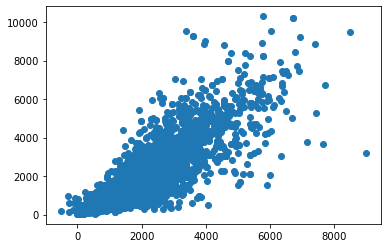

In [110]:
from xgboost import XGBRegressor

xg_model= XGBRegressor()
xg_model.fit(X_train_std,Y_train)
score= xg_model.score(X_test_std,Y_test)
print("score", score)
y_pred= xg_model.predict(X_test_std)
rmse= np.sqrt(mean_squared_error(Y_test,y_pred))
print("rmse", rmse)
plt.scatter(y_pred,Y_test)
plt.show()


In [111]:
result= pd.DataFrame({"actual":Y_test,"Pred":y_pred})
result.head()

,actual,Pred
9389,4643.955078,4502.492188
1218,918.804016,1321.980957
4594,3719.158691,5854.777832
5021,1491.391968,1770.582397
10981,2570.653809,2944.307617


# Hyper Parameter Tuning

In [100]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=np.linspace(0.1, 1.0, 10)

# define grid search
grid = dict(n_estimators=n_estimators)

#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=101)

grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           scoring='r2',error_score=0,verbose=2,cv=2)

grid_search_forest.fit(X_train_std, Y_train)

# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")


Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best: 0.647 using {'n_estimators': 1000}
0.614 (0.001) with: {'n_estimators': 10}
0.642 (0.002) with: {'n_estimators': 100}
0.647 (0.000) with: {'n_estimators': 1000}


In [57]:
grid_search_forest.best_params_

{'n_estimators': 1000}

In [58]:
grid_search_forest.best_score_

0.6466687515754861

In [59]:
Y_pred_rf_grid=grid_search_forest.predict(X_test_std)

In [60]:
r2_score(Y_test,Y_pred_rf_grid)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


0.749398063595435

# Decision Tree

In [140]:
from sklearn.tree import DecisionTreeRegressor
tree_model= DecisionTreeRegressor()
tree_model.fit(X_train_std,Y_train)
score= tree_model.score(X_test_std,Y_test)
print(score)

0.5344022952767136


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


# ADA Gra

In [120]:
from sklearn.ensemble import AdaBoostRegressor

ada_reg= AdaBoostRegressor(n_estimators=10,learning_rate=.3)
ada_reg.fit(X_train_std,Y_train)
ada_reg.score(X_test_std,Y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


0.5792145194024629

# Save your model

In [95]:
import joblib

In [101]:
joblib.dump(grid_search_forest,r'C:\Users\Roshan\Desktop\Sales_Pred\Sales_Prediction\models\random_forest_grid.sav')

['C:\\Users\\Roshan\\Desktop\\Sales_Pred\\Sales_Prediction\\models\\random_forest_grid.sav']

In [89]:
model=joblib.load(r'C:\Users\Roshan\Desktop\Re_Prediction\models\random_forest_grid.sav')